[Reference](https://medium.com/@rajat.jain1/natural-language-extraction-using-spacy-on-a-set-of-novels-88b159d68686)

In [3]:
import spacy
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
nlp = spacy.load('en')
import random
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [4]:
emma = gutenberg.raw('austen-emma.txt')
parsed_emma = nlp(emma)

In [5]:
import re
sample_size = 100
my_sample = random.sample(list(parsed_emma.sents),sample_size) 

# select a random sample of sentences
sample=[]
for sent in my_sample:
    sent = re.sub("\s+"," ",sent.text) 
    # clean up the whitespace
    print(sent,"\n")
    sample.append(sent)

"But have you really heard of nothing?"  

she heard any thing about her, since their being at Randalls?--  

"Perry!" said he to Emma, and trying, as he spoke, to catch Miss  

Such another small basin of thin gruel as his own was all that he could, with thorough self-approbation, recommend; though he might constrain himself, while the ladies were comfortably clearing the nicer things, to say:  

_ 

John loves Emma with a reasonable and therefore not a blind affection, and Isabella always thinks as he does; except when he is not quite frightened enough about the children.  

Too much indebted to the event for his acquittal.--  

_Adair 

Churchill talked of; and, for his sake, greater pleasure than ever in seeing Mr. and Mrs. Weston; she was very often thinking of him, and quite impatient for a letter, that she might know how he was,  

He does not think of the draught.  

her friends-- 

Towards the end of Jane's second song, her voice grew thick.  

Mrs. Weston, your argument weigh

In [6]:
entities=[]
type_entity=[]
sentences=[]
for sent in sample:
    parsed_sentence=nlp(sent)
    for ent in parsed_sentence.ents:
        if ent.text not in entities:
            entities.append(ent.text)
            sentences.append(sent)
            type_entity.append(ent.label_)
Entities=pd.DataFrame({'Sentence':sentences,'Entity':entities,'Entity_type':type_entity})
print('The total number of entities detected were:{}'.format(len(Entities)))
Entities

The total number of entities detected were:34


,Sentence,Entity,Entity_type
0,"""Perry!"" said he to Emma, and trying, as he sp...",Emma,ORG
1,John loves Emma with a reasonable and therefor...,John,PERSON
2,John loves Emma with a reasonable and therefor...,Isabella,PERSON
3,"Churchill talked of; and, for his sake, greate...",Weston,PERSON
4,"Towards the end of Jane's second song, her voi...",Jane,PERSON
5,"Towards the end of Jane's second song, her voi...",second,ORDINAL
6,"""What two letters!--express perfection!",two,CARDINAL
7,"Before the end of September, Emma attended Har...",the end of September,DATE
8,"Before the end of September, Emma attended Har...",Harriet,PERSON
9,"Before the end of September, Emma attended Har...",Robert Martin,PERSON


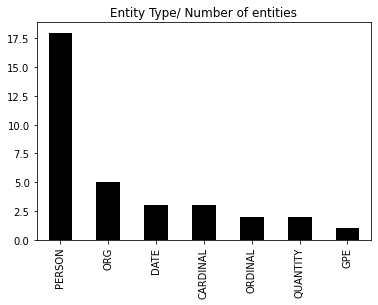

In [7]:
ax = plt.subplot(111)
Entities.Entity_type.value_counts().plot(kind='bar',title='Entity Type/ Number of entities',color='k')